## Visualization of One Election 
#### It performs MDS on the data and outputs the candidates and voters positions on a single axis 


In [5]:
import seaborn as sns

from scipy.stats import kurtosis, skew

from rcv_distribution import *
from rcv_dimensionality import *

##### Assign csv to the path of the file you are wishing to analyse

/Users/Mahshad/Documents/GitHub/bugs-in-democracy/team_arrow/cvr_class/rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'Moree, Gregg J.': 0.0, 'Williamson, James M.': 2.7395185530659063, 'Leavitt, Neal W.': 3.4521176841241945, 'Ward, Larry W.': 5.5331804447843655, 'Maher, David P.': 6.061743143821779, 'Simmons, E. Denise': 7.374585389543648, 'Reeves, Kenneth E.': 7.431396148475788, 'Stohlman, Jr., Thomas J.': 7.767211041047379, 'Toomey, Jr., Timothy J.': 7.7972828368965486, 'Sullivan, Edward J.': 8.232381600210953, 'Davis, Henrietta': 9.363228009073254, 'Marquardt, Charles J.': 9.374864859009337, 'Seidel, Sam': 9.748547721665396, 'vanBeuzekom, Minka Y.': 11.207260827034258, 'Decker, Marjorie C.': 11.534043191223196, 'Cheung, Leland': 12.088491729054475, 'Kelley, Craig A.': 12.13669162010367, 'Glick, Silvia P.': 13.871063686469407, 'Adkins, Lawrence J.': 15.865697683365942, 'Flanagan, Mark F.': 17.128560131296403, 'Podgers, Kathy': 20.0}


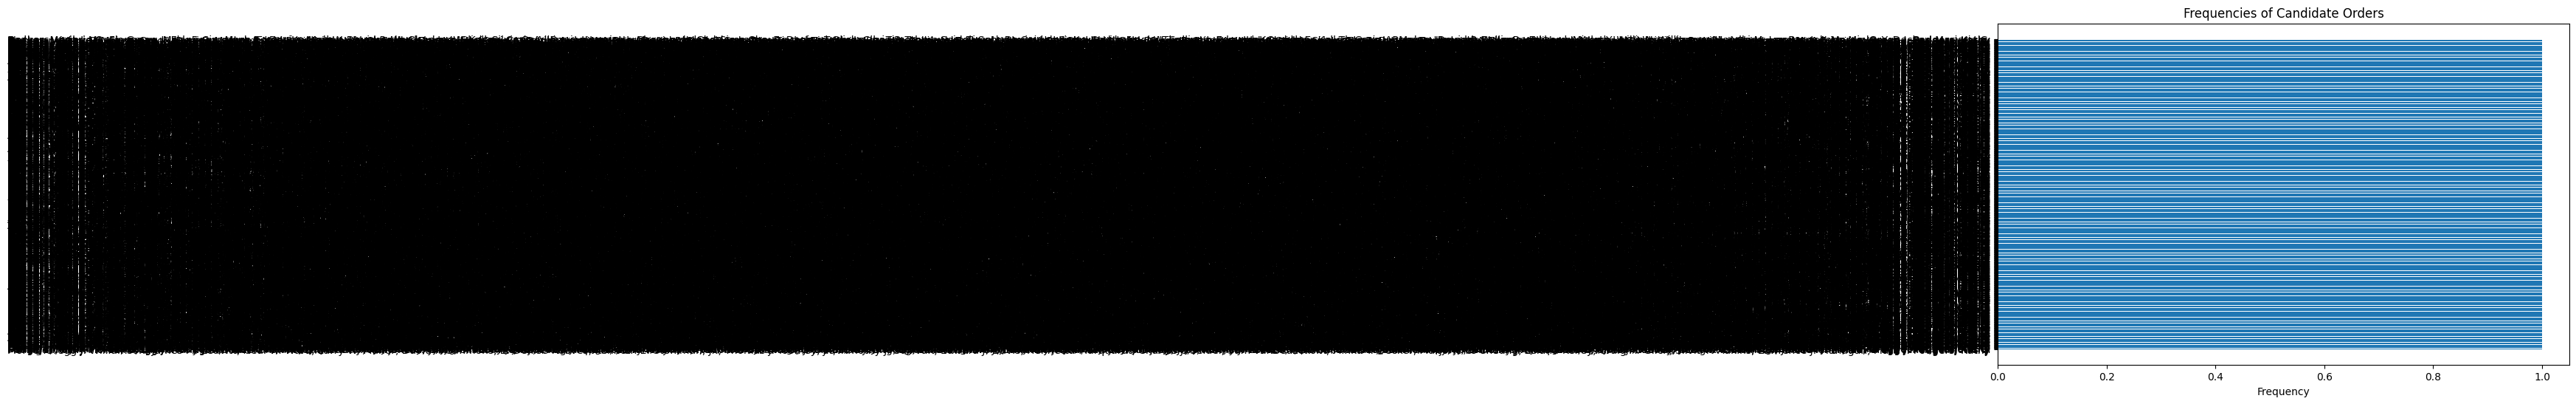

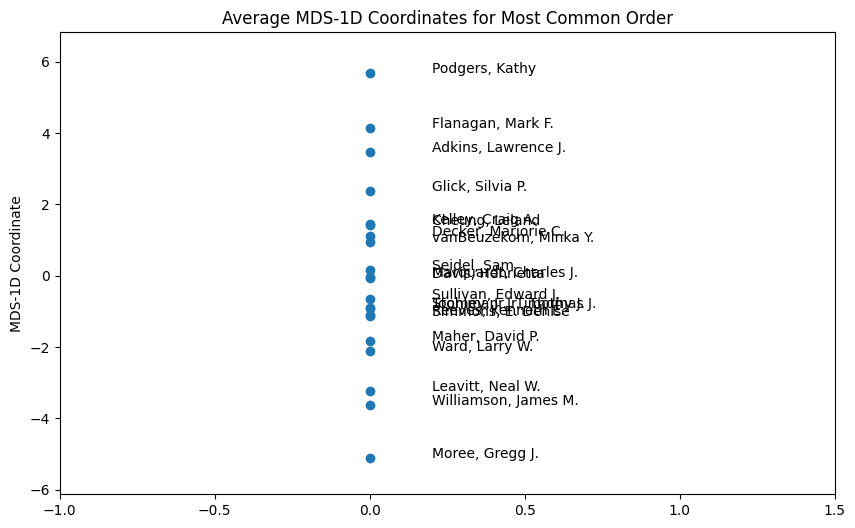

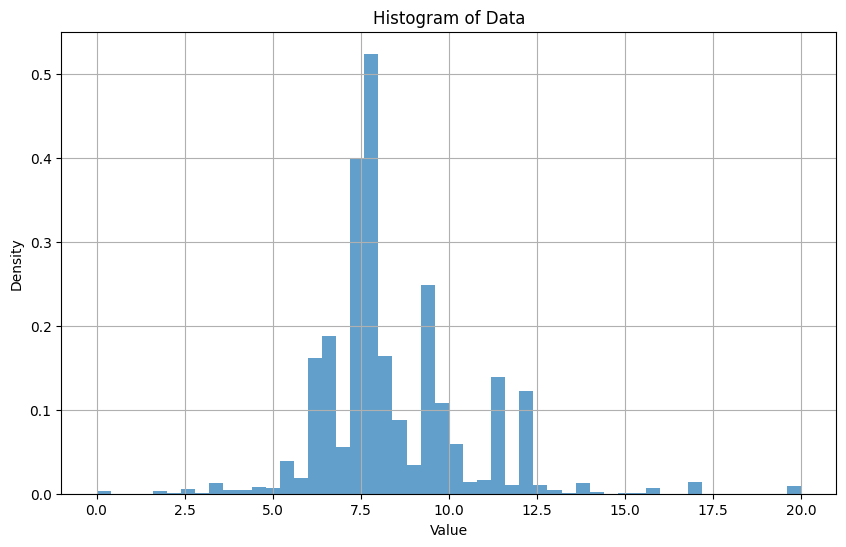

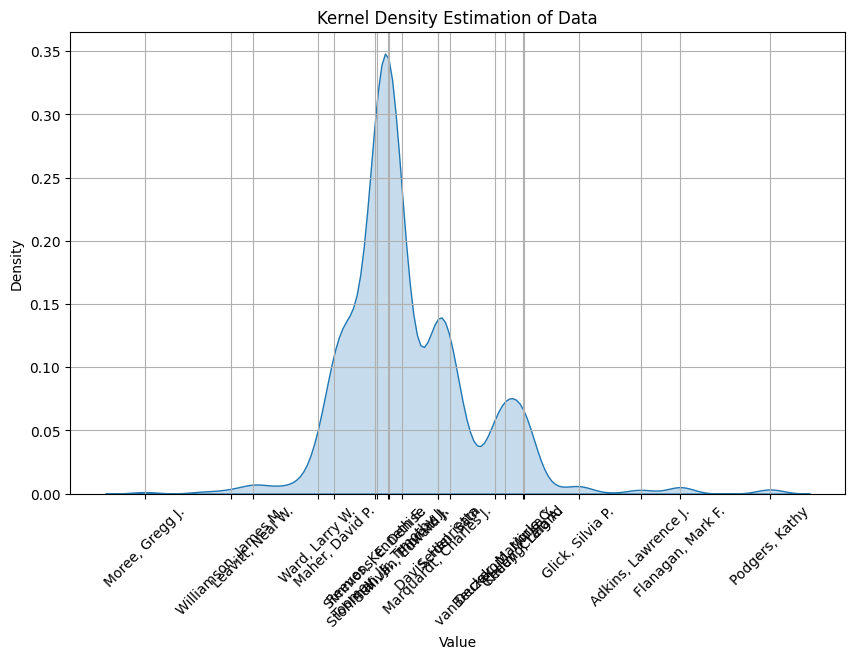

In [6]:
# Test the function with a custom CSV file
csv = "Proportional/Cambridge_11032009_CityCouncil.csv"

# Perform the RCV analysis
test = perform_rcv_analysis(csv, n_runs=1000)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

# Print the normalized distances between candidates and plot the MDS analysis
normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
print("Normalized distances:", normalized_distances)
plot_rcv_analysis(mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names)

# Get the consistency points for the bimodality analysis
points = get_consistency_points(csv, normalized_distances)

# Create a list of data points
data_points = []
for key, value in points.items():
    data_points.extend([key] * value)

# Convert to numpy array
data_points = np.array(data_points)

# Prepare data for histogram
data_list = [x for x, count in points.items() for _ in range(count)]

normalized_points = []
normalized_names = []
for name in normalized_distances:
    normalized_names.append(name)
    normalized_points.append(normalized_distances[name])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_list, bins=50, density=True, alpha=0.7)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Plot kernal density estimation
plt.figure(figsize=(10, 6))
sns.kdeplot(data_list, fill=True)
plt.title('Kernel Density Estimation of Data')
plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


#### run this cell to see the bimodality and gamma indices

In [7]:
# Calculate skewness and kurtosis
g = skew(data_points)
k = kurtosis(data_points)

# Calculate bimodality coefficient
n = len(data_points)
bimodality = (g**2 + 1) / (k + 3 * (n-1)**2 / ((n-2) * (n-3)))
print("Bimodality coefficient:", bimodality)

print("Gamma coefficiet:", calculate_gamma(csv, normalized_distances))



Bimodality coefficient: 0.33973510514354605
Gamma coefficiet: 0.19799247176913426
